# Кейс 12. Прогнозирование для магазина «Golden Light VIP Elite»

### Задачи:

    1.Какие действия отдела продаж оказывают позитивное влияние на показатели продаж?
    2.Какие действия не приносят видимого эффекта?
    3.Какая линейная модель позволит спрогнозировать продажи в каком-либо месяце?

### Импорт библиотек и чтение данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Ознакомимся с нашими данными:

In [2]:
mark_data = pd.read_csv('lights_sales_data.csv')
mark_data.head()

,month_number,TV,Radio,Newspapers,Surveys,total_marketing_spendings,"total_marketing_spendings, $",days_in_month,days_of_sales,sales
0,1,230.1,37.8,69.2,9.2,337.1,5.170245,29,12,45.2
1,2,44.5,39.3,45.1,24.9,128.9,1.976994,30,17,38.1
2,3,17.2,45.9,69.3,10.6,132.4,2.030675,31,9,36.7
3,4,151.5,41.3,58.5,30.0,251.3,3.854294,30,17,41.0
4,5,180.8,10.8,58.4,13.2,250.0,3.834356,31,2,37.6


В нашем случае параметрами модели будут:

1. Sales, так как эту величину мы планируем прогнозировать.

2. Все остальные столбцы, кроме month_number (фактически это просто номер наблюдения), так как влияние этих параметров на продажи мы и должны отследить.

### Анализ данных 

#### Посмотрим на матрицу корреляций

In [3]:
mark_data.loc[:, [x for x in mark_data.columns if x != 'month_number' and x != 'Sales']].corr() # убираем столбцы 'month_number' и 'Sales'

,TV,Radio,Newspapers,Surveys,total_marketing_spendings,"total_marketing_spendings, $",days_in_month,days_of_sales,sales
TV,1.000000,0.054809,0.056648,0.007348,0.945330,0.945330,0.012663,0.171939,0.739902
Radio,0.054809,1.000000,0.354104,0.061084,0.293211,0.293211,0.111377,0.048575,0.340511
Newspapers,0.056648,0.354104,1.000000,-0.043030,0.343059,0.343059,0.060290,-0.033053,0.156776
Surveys,0.007348,0.061084,-0.043030,1.000000,0.006459,0.006459,0.109435,0.068414,0.050647
total_marketing_spendings,0.945330,0.293211,0.343059,0.006459,1.000000,1.000000,0.043596,0.158768,0.774248
"total_marketing_spendings, $",0.945330,0.293211,0.343059,0.006459,1.000000,1.000000,0.043596,0.158768,0.774248
days_in_month,0.012663,0.111377,0.060290,0.109435,0.043596,0.043596,1.000000,0.233911,0.054299
days_of_sales,0.171939,0.048575,-0.033053,0.068414,0.158768,0.158768,0.233911,1.000000,0.382708
sales,0.739902,0.340511,0.156776,0.050647,0.774248,0.774248,0.054299,0.382708,1.000000


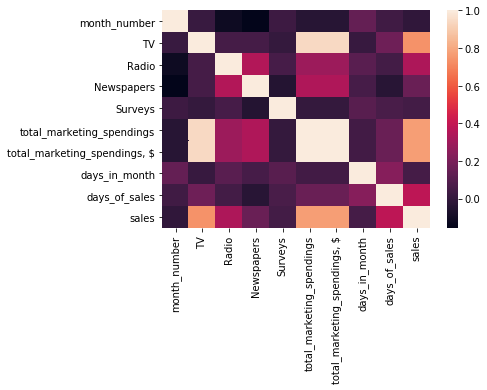

In [4]:
sns.heatmap(mark_data.corr()) # Построим тепловую карту корреляций

#### Проверим параметры модели на мультиколлинеарность

На тепловой карте корреляций видно, что переменные total_marketing_spendings и total_marketing_spendings, $	 сильно коррелируют друг с другом, то есть они полностью линейно зависимы. При наличии таких переменных нужно оставить лишь одну для модели:

In [5]:
mark_data = mark_data.loc[:, [x for x in mark_data.columns if x != 'total_marketing_spendings, $']]

Также мы видим, что переменная total_marketing_spendings скоррелирована с переменной TV, а также имеется слабая корреляция с Radio, Newspapers. Возможно, total_marketing_spendings — просто сумма этих трёх параметров (о чем нам и говорит название).

Проверим их корреляцию:

In [6]:
pd.DataFrame([mark_data.loc[:, ['TV', 'Radio', 'Newspapers']].sum(axis = 1), mark_data.total_marketing_spendings]).T.corr()

,Unnamed 0,total_marketing_spendings
Unnamed 0,1.0,1.0
total_marketing_spendings,1.0,1.0


Как мы видим, действительно переменные TV, Radio, Newspapers в сумме дают столбец total_marketing_spendings. В таком случае лучше оставить более низкоуровневые параметры, чтобы отслеживать их влияние на результат. Поэтому исключим столбец total_marketing_spendings:

In [7]:
mark_data = mark_data.loc[:, [x for x in mark_data.columns if x != 'total_marketing_spendings']]

#### Визуализируем параметры

Теперь можно визуально посмотреть, какие параметры коррелируют с продажами. 

In [8]:
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

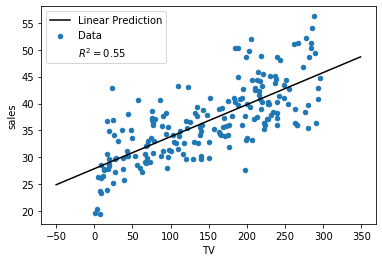

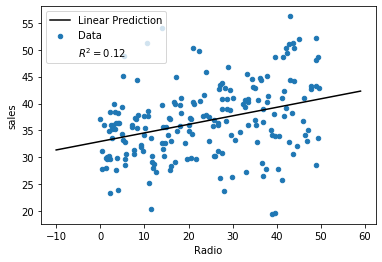

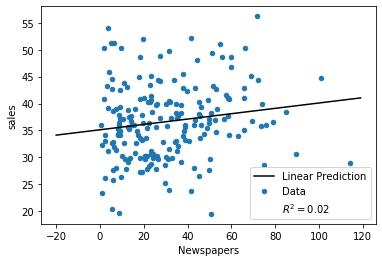

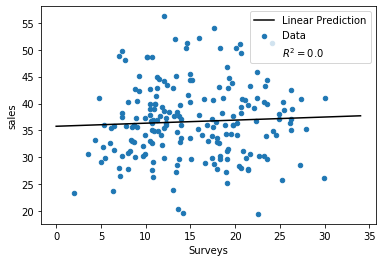

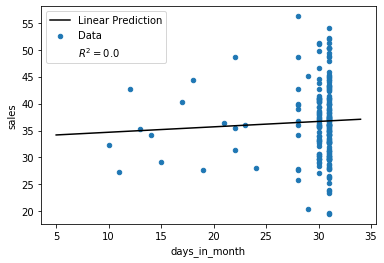

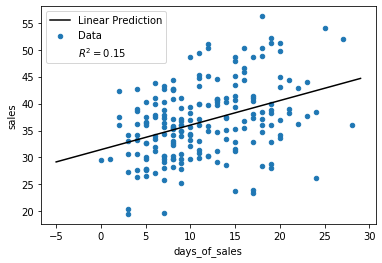

In [9]:
for col in mark_data.iloc[:, 1:-1].columns:
    ax = plt.subplot()
    mark_data.plot(x = col, y = 'sales', kind = 'scatter', ax = ax, label = 'Data')
    model = LinearRegression()
    model.fit(mark_data.loc[:, [col]] #используем такой синтаксис, так как на вход должна подаваться линейная модель
              , mark_data.sales)
    r_sq = model.score(mark_data.loc[:, [col]], mark_data.sales)
    ax.plot(list(range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1]))),
            [model.intercept_ + model.coef_*x for x in list(range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1])))]
            , label = 'Linear Prediction', color = 'black')
    handles, labels = ax.get_legend_handles_labels()
    handles.append(mpatches.Patch(color='none', label='$R^2 = ' + str(round(r_sq, 2)) + '$'))
    ax.legend(handles = handles)
    plt.show()

Как мы видим, **параметры Surveys и days_in_month можно убрать из датасета, потому что они не объясняют дисперсию в данных.**

In [10]:
mark_data = mark_data.loc[:, [x for x in mark_data.columns if x != 'Surveys' and x != 'days_in_month']]

Есть несколько параметров, относительно которых линейная модель как-то коррелирует с продажами. Вот они:

    TV
    Radio
    Newspapers
    days_of_sales

**Указанные параметры влияют на продажи, их мы будем использовать в многомерной линейной регрессии.**

#### Многомерная регрессия

Для получения результатов многомерной линейной регрессии используется уже готовая функция в пакете statsmodels. Рассмотрим, как можно получить параметры линейной регрессии:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     113.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           8.14e-50
Time:                        22:55:50   Log-Likelihood:                -549.52
No. Observations:                 200   AIC:                             1109.
Df Residuals:                     195   BIC:                             1126.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8616      0.843     25.921

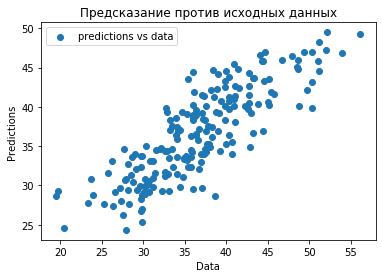

In [11]:
import statsmodels.api as sm

X = sm.add_constant(mark_data.loc[:, ['TV', 'Radio', 'Newspapers', 'days_of_sales']])
 
model = sm.OLS(mark_data.sales, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
plt.scatter(mark_data.sales, predictions, label = 'predictions vs data')
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.title('Предсказание против исходных данных')
plt.legend()
plt.show()

#### Анализ результатов

Полученные результаты содержат крайне много интересных данных. Рассмотрим три важных параметра.

R-squared, коэффициент детерминации, который показывает, какую долю дисперсии мы можем объяснить нашей моделью. В нашем случае это 70 %, то есть наша линейная модель описывает 70% дисперсии.

Высокий F-statistic = 113,6 и Prob (F-statistic): 8.14e-50. Полученные значения говорят нам о том, что модель описывает данные статистически значимо.

Durbin-Watson (Статистика Дарбина-Ватсона), показывающая, насколько в переменных присутствуют автокорреляции (взаимосвязи между последовательностью величин одного ряда, взятыми со сдвигом по времени/измерению). Эта статистика может принимать значения от 0 до 4. При значении, близком к двойке, автокорреляций не наблюдается. Наше значение равное 2.287 говорит о том, что автокорреляции нет.

#### Проверяем ошибки
Проверим, что ошибка измерения случайна и имеет постоянный разброс, с помощью QQ-plot:

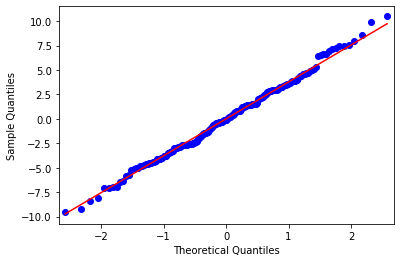

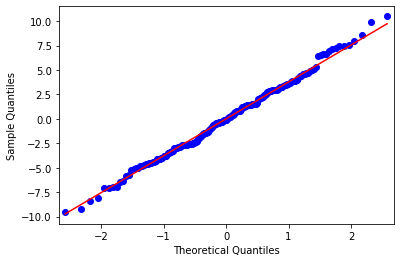

In [12]:
from statsmodels.graphics.gofplots import qqplot # Импорт части библиотеки для построения qq-plot
qqplot(model.resid  # Ошибки модели
       , line = 's')

Как мы видим из QQ-plot, распределение ошибок нормальное, то есть имеет постоянный разброс и является случайной величиной, распределённой нормально.

Проверим, что ошибки измерений не зависят сами от себя (отсутствие самокорреляции):

In [13]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

2.2869127436631884

Статистика Дурбина-Ватсона показывает, что автокорреляции нет (т. к. статистика близка к 2).

Проверим также ошибки на корреляцию со значимыми параметрами модели:

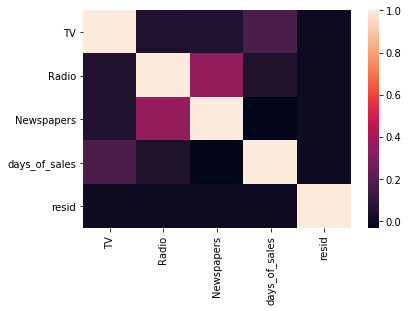

In [14]:
mark_data['resid'] = model.resid
sns.heatmap(mark_data.loc[:, ['TV', 'Radio', 'Newspapers', 'days_of_sales', 'resid']].corr());

Как мы видим, ошибки не коррелируют с параметрами модели, а значит, применение линейной модели легально.

#### Коэффициенты линейной регрессии и их значимость

Как мы видим из модели линейной регрессии, для параметра Newspapers не выявлено значимое влияние на продажи (p-value >= 0.05), поэтому его придётся исключить из финальной модели. Остальные же параметры были нами правильно выбраны по предварительному анализу.

Итак, итоговая линейная модель предсказания продаж будет выглядеть следующим образом:

**Sales=0.055∗TV+0.131∗Radio+0.302∗days_of_sales+21.862**


### Выводы

- Без рекламы на ТВ, радио и дней распродаж компания продаёт в среднем на 21,862. Причём интервал продаж - от 20.2 до 23.5.
- Значимый вклад в продажи вносят реклама на ТВ, радио и распродажи. В них стоит вкладываться, если потратить 1 единицу на рекламу на ТВ стоит меньше, чем 0.055; потратить 1 единицу на рекламу по радио дешевле, чем 0.131; а провести распродажу  дешевле, чем 0.302.
- Не стоит вкладываться в рекламу в газетах, она не приносит значимого улучшения продаж.
- Также не стоит тратить время на исследования рынка — они совсем никак не влияют на продажи.
- Линейная модель для расчёта продаж в каком-либо месяце: Sales=0.055∗TV+0.131∗Radio+0.302∗days_of_sales+21.862.
- Можно попробовать проводить дополнительные распродажи.
- Реклама на радио окупается лучше, чем реклама на ТВ, возможно стоит внести изменения в рекламу на ТВ, расширив например количество каналов, на которых будет транслироваться реклама, либо увеличить количество трансляций.